Total sales:  4120.198879153005


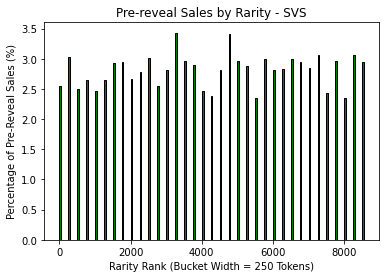

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint

COLLECTION_NAME = "SVS" # For the graph title
TOKEN_COL = 'TOKEN_ID'


MAX_TOKEN_ID = 8888
BUCKET_WIDTH = 250
TOKENS = 8888

sales = pd.read_csv("../data/pre-reveal_sales.csv")
sales = sales[sales["DATE"] < "2021-09-13T23:00:00"]
rarity_dict = {}

LEN = len(sales)
bins = int(TOKENS / BUCKET_WIDTH)

total_sales = 0
for i in range(0, bins): 
    upper = (i + 1) * BUCKET_WIDTH
    lower = i * BUCKET_WIDTH
    
    hist_bin = sales[ (sales["RANK"] > lower) & (sales["RANK"] < upper)]
    rarity_dict[lower] = len(hist_bin["PRICE"]) / LEN * 100
    total_sales += hist_bin["PRICE"].sum()


plt.bar(rarity_dict.keys(), rarity_dict.values(), width = 50, color='g', align = "edge", edgecolor ='black')
plt.title("Pre-reveal Sales by Rarity - {}".format(COLLECTION_NAME))
plt.xlabel("Rarity Rank (Bucket Width = {} Tokens)".format(BUCKET_WIDTH), fontsize = 10)
plt.ylabel("Percentage of Pre-Reveal Sales (%)", fontsize = 10)

plt.savefig('../figures/{}_price_vs_rank_pre-reveal_hist_pct.png'.format(COLLECTION_NAME), dpi = 300)
plt.show()